Convert between frequency and channel number for PFB input and output at different values of the mixer frequency.

No actual tones are generated or read, so the connections do not matter for this demonstration.

In [1]:
import sys
sys.path.append('../../../qick/qick_lib/')
sys.path.append('../soft/')
import Scan
from mkids import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
board = Scan.getBoard()
if board == 'zcu111':
    bitfile = 'mkids_2x2_kidsim_v1'    
elif board == 'zcu216':
    bitfile = 'mkids_2x2_kidsim_v2'
elif board == 'rfsoc4x2':
    bitfile = 'mkids_v3'
else:
    raise Exception("Do not know what to do with %s"%board)
scan = Scan.Scan(bitfile, iKids=0, iSimu=0)

In [3]:
fMixers = np.array([512,1024])
fToneOffset = 143.4

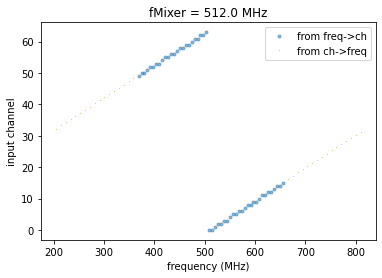

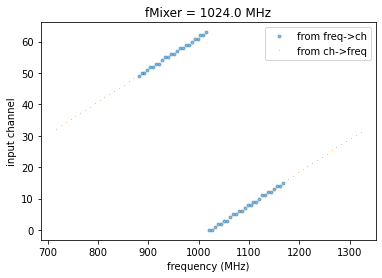

In [4]:
for iMixer in range(len(fMixers)):
    scan.set_mixer(fMixers[iMixer])
    f0 = fMixers[iMixer] - fToneOffset
    f1 = fMixers[iMixer] + fToneOffset
    inFreqs = np.linspace(f0,f1)
    inChs = scan.inFreq2ch(inFreqs)
    plt.plot(inFreqs, inChs, '.',  label="from freq->ch", alpha=0.5)
    inChs2 = np.arange(inChs.min(),inChs.max()+1)

    inFreqs2 = scan.inCh2Freq(inChs2)
    plt.plot(inFreqs2, inChs2, ',', label="from ch->freq", alpha=0.5)
    plt.xlabel("frequency (MHz)")
    plt.ylabel("input channel")
    plt.title("fMixer = %.1f MHz"%scan.get_mixer())
    plt.legend()
    plt.show()

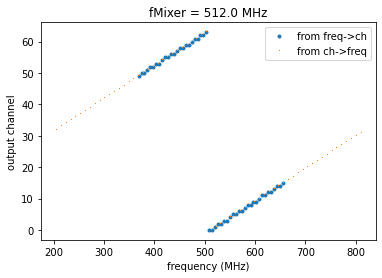

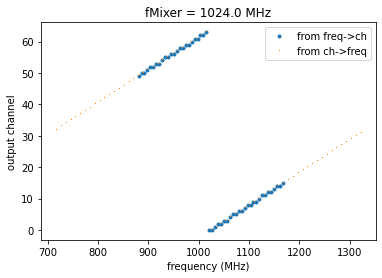

In [5]:
for iMixer in range(len(fMixers)):
    scan.set_mixer(fMixers[iMixer])
    f0 = fMixers[iMixer] - fToneOffset
    f1 = fMixers[iMixer] + fToneOffset
    outFreqs = np.linspace(f0,f1)
    outChs = scan.outFreq2ch(outFreqs)
    plt.plot(outFreqs, outChs, ".", label="from freq->ch")
    outChs2 = np.arange(outChs.min(),outChs.max()+1)
    outFreqs2 = scan.outCh2Freq(inChs2)
    plt.plot(outFreqs2, outChs2, ",", label="from ch->freq")
    plt.xlabel("frequency (MHz)")
    plt.ylabel("output channel")
    plt.title("fMixer = %.1f MHz"%scan.get_mixer())
    plt.legend()
    plt.show()